In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.core.display import HTML
HTML("<style>.rendered_html th {max-width: 30px;}</style>")

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Load Files
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug_trial_complete = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])

# Create a subset of the dataset for 4 drugs
drug_list = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
drug_trial_subset = drug_trial_complete.loc[drug_trial_complete['Drug'].isin(drug_list)]

# Display the data table for preview
drug_trial_subset

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
...,...,...,...,...,...
1891,i557,45,47.685963,1,Capomulin
1896,t718,45,63.423695,4,Placebo
1901,r944,45,41.581521,2,Capomulin
1902,u364,45,31.023923,3,Capomulin


In [2]:
# Add function to label numbers associated with bars in bar chart
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume_data = drug_trial_subset.groupby(["Drug", "Timepoint"], as_index = False).agg(
    {"Tumor Volume (mm3)": 'mean'}
)
# Convert to DataFrame

# Preview DataFrame
mean_tumor_volume_data

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_tumor_volumes_data = drug_trial_subset.groupby(["Drug", "Timepoint"], as_index = False).agg(
    {"Tumor Volume (mm3)": 'sem'}
)
# Convert to DataFrame

# Preview DataFrame
std_error_tumor_volumes_data

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [5]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_data.rename(columns = {'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'}, inplace = True)

# Preview that Reformatting worked
mean_tumor_volume_data.head()

,Drug,Timepoint,Average Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Minor Data Munging to Re-Format the Data Frames
std_error_tumor_volumes_data.rename(columns = {'Tumor Volume (mm3)':'Std Error Tumor Volume (mm3)'}, inplace = True)

# Preview that Reformatting worked
std_error_tumor_volumes_data.head()

,Drug,Timepoint,Std Error Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Combine 2 dataframes into one
drug_trial_summary = pd.merge(mean_tumor_volume_data, std_error_tumor_volumes_data, how="left", 
                               left_on=["Drug", "Timepoint"],
                               right_on=["Drug", "Timepoint"])
drug_trial_summary

,Drug,Timepoint,Average Tumor Volume (mm3),Std Error Tumor Volume (mm3)
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731
5,Capomulin,25,39.939528,0.881642
6,Capomulin,30,38.769339,0.934460
7,Capomulin,35,37.816839,1.052241
8,Capomulin,40,36.958001,1.223608
9,Capomulin,45,36.236114,1.223977


In [8]:
# Helped by stackoverflow "Plotting errorbar with mean and std after grouping"

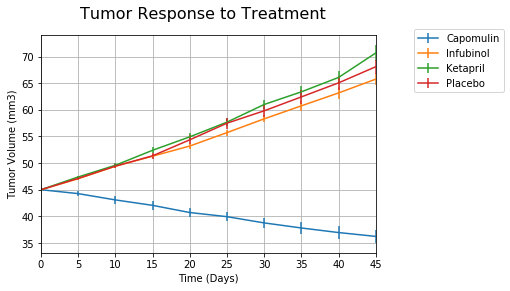

In [17]:
# Generate the Plot (with Error Bars)
# Setting up the plot
x_axis = np.arange(0, 45, 5)


fig, ax = plt.subplots()
ax.set_xlim(-1, 46)


for key, group in drug_trial_summary.groupby('Drug'):
    group.plot('Timepoint', 'Average Tumor Volume (mm3)', yerr='Std Error Tumor Volume (mm3)', label=key, ax=ax)
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.grid(True)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
fig.suptitle('Tumor Response to Treatment', fontsize=16)

# Save the Figure
plt.savefig('tumor_reponse_to_treatment.png',bbox_inches='tight')

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [18]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_sites_data = drug_trial_subset.groupby(["Drug", "Timepoint"], as_index = False).agg(
    {"Metastatic Sites": 'mean'}
)
# Preview DataFrame
mean_metastatic_sites_data

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [19]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_error_metastatic_sites_data = drug_trial_subset.groupby(["Drug", "Timepoint"], as_index = False).agg(
    {"Metastatic Sites": 'sem'}
)
# Convert to DataFrame

# Preview DataFrame
std_error_metastatic_sites_data

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [20]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_sites_data.rename(columns = {'Metastatic Sites':'Average Number of Metastatic Sites'}, inplace = True)

# Preview that Reformatting worked
mean_metastatic_sites_data.head()

,Drug,Timepoint,Average Number of Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [21]:
# Minor Data Munging to Re-Format the Data Frames
std_error_metastatic_sites_data.rename(columns = {'Metastatic Sites':'Std of Error for Metastatic Sites'}, inplace = True)

# Preview that Reformatting worked
std_error_metastatic_sites_data.head()

,Drug,Timepoint,Std of Error for Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [22]:
# Combine 2 dataframes into one
drug_trial_summary_2 = pd.merge(mean_metastatic_sites_data, std_error_metastatic_sites_data, how="left", 
                               left_on=["Drug", "Timepoint"],
                               right_on=["Drug", "Timepoint"])
drug_trial_summary_2.head()

,Drug,Timepoint,Average Number of Metastatic Sites,Std of Error for Metastatic Sites
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,0.074833
2,Capomulin,10,0.320000,0.125433
3,Capomulin,15,0.375000,0.132048
4,Capomulin,20,0.652174,0.161621


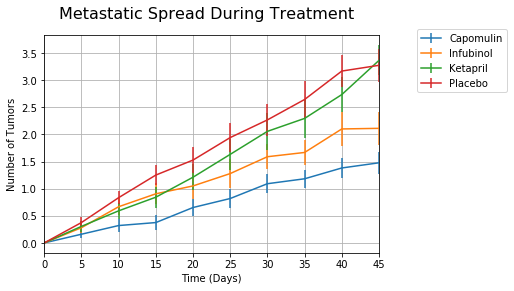

In [24]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 45, 5)
#y_axis = np.arange(30, 80, 5)

fig, ax = plt.subplots()
ax.set_xlim(-1, 46)
#ax.set_ylim(30, 80)

for key, group in drug_trial_summary_2.groupby('Drug'):
    group.plot('Timepoint', 'Average Number of Metastatic Sites', yerr='Std of Error for Metastatic Sites', label=key, ax=ax)   # 2
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.grid(True)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Number of Tumors")
fig.suptitle('Metastatic Spread During Treatment', fontsize=16)


# Save the Figure
plt.savefig('metastatic_spread_during_treatment', bbox_inches = 'tight')
# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [25]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_survival_data = drug_trial_subset.groupby(["Drug", "Timepoint"], as_index = False).agg(
    {"Tumor Volume (mm3)": 'count'}
)
# Convert to DataFrame

# Preview DataFrame
mouse_survival_data

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [26]:
# Minor Data Munging to Re-Format the Data Frames
mouse_survival_data.rename(columns = {'Tumor Volume (mm3)':'Number of Mice'}, inplace = True)
mouse_survival_data['Number of Mice'] = mouse_survival_data['Number of Mice'].astype(int)

starting_number_of_mice = 25
mouse_survival_data['Percent Survived'] = (mouse_survival_data['Number of Mice']/starting_number_of_mice)*100
# Preview the Data Frame
mouse_survival_data

,Drug,Timepoint,Number of Mice,Percent Survived
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0
5,Capomulin,25,22,88.0
6,Capomulin,30,22,88.0
7,Capomulin,35,22,88.0
8,Capomulin,40,21,84.0
9,Capomulin,45,21,84.0


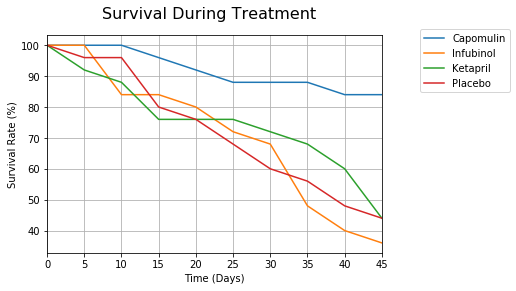

In [27]:
# Generate the Plot (Accounting for percentages)
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 45, 5)
#y_axis = np.arange(30, 80, 5)

fig, ax = plt.subplots()
ax.set_xlim(-1, 46)

for key, group in mouse_survival_data.groupby('Drug'):
    group.plot('Timepoint', 'Percent Survived', label=key, ax=ax) 
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.grid(True)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
fig.suptitle('Survival During Treatment', fontsize=16)

# Save the Figure
plt.savefig('survival_during_treatment',bbox_inches = 'tight')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [28]:
# Calculate the percent changes for each drug
# Sort DataFrame before grouping.
mean_tumor_volume_data = mean_tumor_volume_data.sort_values(['Drug', 'Timepoint']).reset_index(drop=True)

# Group on keys and call `pct_change` inside `apply`.
mean_tumor_volume_data['Percent Change'] = mean_tumor_volume_data.groupby('Drug', sort=False)['Average Tumor Volume (mm3)'].apply(
     lambda x: x.pct_change(periods=9)).values

# Display the data to confirm
mean_tumor_volume_data['Percent Change'] = round(mean_tumor_volume_data['Percent Change'] *100)
mean_tumor_volume_data.dropna(inplace = True)
mean_tumor_volume_data

,Drug,Timepoint,Average Tumor Volume (mm3),Percent Change
9,Capomulin,45,36.236114,-19.0
19,Infubinol,45,65.755562,46.0
29,Ketapril,45,70.662958,57.0
39,Placebo,45,68.084082,51.0


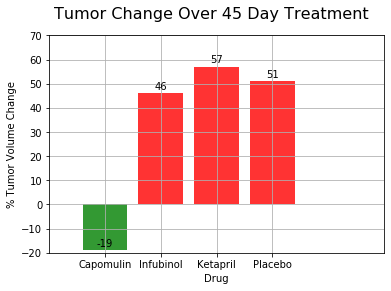

In [44]:
# Splice the data between passing and failing drugs
mean_tumor_volume_data['Positive'] = mean_tumor_volume_data['Percent Change'] > 0

# Store all Relevant Percent Changes into a Tuple
subset = mean_tumor_volume_data[['Drug', 'Percent Change', 'Positive']]
#tuples = [tuple(x) for x in subset.to_numpy()]
#print(tuples)

drug = subset['Drug'].tolist()
pct_change = subset['Percent Change'].tolist()
positive = subset['Positive'].tolist()

fig, ax = plt.subplots()
x_axis = np.arange(len(drug)) 
ax.set_ylim(-20, 70)
ax.set_xlim(-1, len(drug)+1)

# Orient widths. Add labels, tick marks, etc.
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug)

rects = ax.bar(x_axis, pct_change, color=subset['Positive'].map({True: 'r', False: 'g'}), align="center", alpha = .8)

# Use functions to label the percentages of changes
autolabel(rects, ax)

plt.grid(True)
ax.set_xlabel("Drug")
ax.set_ylabel("% Tumor Volume Change")
fig.suptitle('Tumor Change Over 45 Day Treatment', fontsize=16)

# Save the Figure
plt.savefig('tumor_change_over_45_day_treatment')


![Metastatic Spread During Treatment](../Images/change.png)